In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
import seaborn as sns
sns.set(style="whitegrid")

plt.rc('text', usetex = False)
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font',   size      = SMALL_SIZE)   # controls default text sizes
plt.rc('axes',   titlesize = SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize = MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (7, 5)

In [25]:
filterData = pd.read_table('test.lst', sep=' ', skipinitialspace=True, skiprows=0, keep_default_na = False, header=None)

In [56]:
def twos_complement(hexstr,bits):    
    value = int(hexstr,16)    
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

In [114]:
realPt = np.zeros(len(filterData))
imPt = np.zeros(len(filterData))
t_us = filterData.iloc[:,0] * 1e-6
for i in range(len(filterData)):
    strRe = filterData.iloc[i,2].split('h')[1]
    realPt[i] = twos_complement(strRe,40)
    strIm = filterData.iloc[i,3].split('h')[1]
    imPt[i] = twos_complement(strIm,40)


Text(0.5, 0, 'Time (us)')

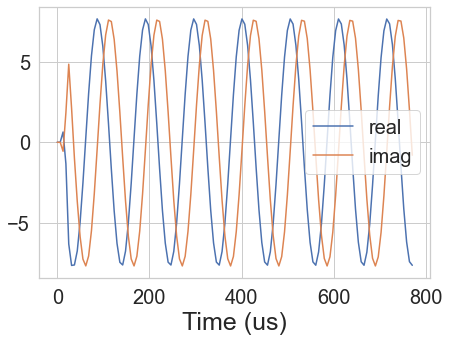

In [115]:
plt.plot(t_us, realPt*1e-9, label='real')
plt.plot(t_us, imPt*1e-9, label='imag')
plt.legend()
plt.xlabel('Time (us)')

In [116]:
fs = 162.5e3 # 65 MHZ / 8 / 50 = 162.5 kHz
fft_re = np.fft.fftshift(np.fft.fft(realPt))
fft_im = np.fft.fftshift(np.fft.fft(imPt))
freq = np.linspace(-fs/2, fs/2, len(fft_re))

(-15.0, 15.0)

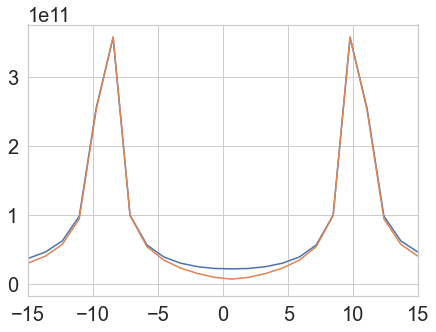

In [117]:
plt.plot(freq*1e-3, np.abs(fft_re), label='real')
plt.plot(freq*1e-3, np.abs(fft_im), label='imag')
plt.xlim([-15,15])

In [118]:
fft_sum = np.fft.fftshift(np.fft.fft(realPt + 1j*imPt))

(-15.0, 15.0)

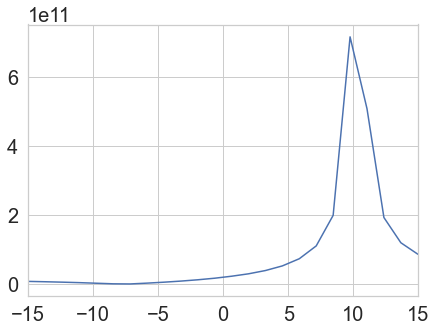

In [119]:
plt.plot(freq*1e-3, np.abs(fft_sum), label='sum')
plt.xlim([-15,15])